In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
df = pd.read_json('../data/logs/model-name-1650387049520.log.jsonl', lines=True)

In [7]:
df.head()

,accuracy,asctime,average_precision,f1,levelname,loss,message,precision,recall,step
0,0.0,2022-04-19 12:50:53,NaN,0.041866,INFO,0.464358,Epoch[1] Complete,0.286885,0.022581,train
1,0.0,2022-04-19 12:50:54,NaN,0.033333,INFO,0.489498,Epoch[1] Complete,0.219512,0.018036,validate
2,0.0,2022-04-19 12:50:55,NaN,0.055123,INFO,0.348713,Epoch[2] Complete,0.386555,0.029677,train
3,0.0,2022-04-19 12:50:56,NaN,0.033333,INFO,0.370258,Epoch[2] Complete,0.219512,0.018036,validate
4,0.0,2022-04-19 12:50:58,NaN,0.048507,INFO,0.287194,Epoch[3] Complete,0.672414,0.025161,train


In [11]:
pd.unique(df.step)

array(['train', 'validate'], dtype=object)

In [12]:
df_train = df[df.step == 'train'].reset_index(drop=True)
df_train.head()

,accuracy,asctime,average_precision,f1,levelname,loss,message,precision,recall,step
0,0.0,2022-04-19 12:50:53,NaN,0.041866,INFO,0.464358,Epoch[1] Complete,0.286885,0.022581,train
1,0.0,2022-04-19 12:50:55,NaN,0.055123,INFO,0.348713,Epoch[2] Complete,0.386555,0.029677,train
2,0.0,2022-04-19 12:50:58,NaN,0.048507,INFO,0.287194,Epoch[3] Complete,0.672414,0.025161,train
3,0.0,2022-04-19 12:51:00,NaN,0.103490,INFO,0.262908,Epoch[4] Complete,0.767857,0.055484,train
4,0.0,2022-04-19 12:51:03,NaN,0.173430,INFO,0.250889,Epoch[5] Complete,0.626506,0.100645,train


In [13]:
df_validate = df[df.step == 'validate'].reset_index(drop=True)
df_validate.head()

,accuracy,asctime,average_precision,f1,levelname,loss,message,precision,recall,step
0,0.0,2022-04-19 12:50:54,NaN,0.033333,INFO,0.489498,Epoch[1] Complete,0.219512,0.018036,validate
1,0.0,2022-04-19 12:50:56,NaN,0.033333,INFO,0.370258,Epoch[2] Complete,0.219512,0.018036,validate
2,0.0,2022-04-19 12:50:59,NaN,0.011765,INFO,0.317291,Epoch[3] Complete,0.272727,0.006012,validate
3,0.0,2022-04-19 12:51:01,NaN,0.000000,INFO,0.310998,Epoch[4] Complete,0.000000,0.000000,validate
4,0.0,2022-04-19 12:51:03,NaN,0.022727,INFO,0.312456,Epoch[5] Complete,0.206897,0.012024,validate


In [28]:
def plot_result(dfs, metric, num_units, dropout, lr, df_names=['train', 'validate'], xlabel="Epoch"):
    for idx, df in enumerate(dfs):
        plt.plot(df.index, df[metric], label=df_names[idx])
    plt.xlabel(xlabel)
    plt.ylabel(metric)
    plt.title(f'# units ={num_units}, dropout = {dropout}, learning rate = {lr}')
    plt.legend()

plot accuracy

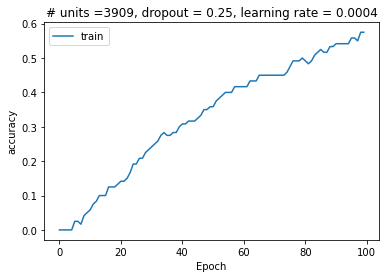

In [34]:
# plt.plot(df_train.index, df_train.accuracy)
# plt.xlabel("Epoch")
# plt.ylabel("accuracy")
# plt.title("# units = 3909, dropout = 0.25, learning rate = 4e-4")

plot_result([df_train], 'accuracy', 3909, 0.25, 4e-4, df_names=['train'])

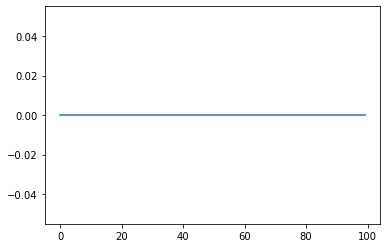

In [15]:
plt.plot(df_validate.index, df_validate.accuracy)

plot loss

Text(0.5, 1.0, '# units = 3909, dropout = 0.25, learning rate = 4e-4')

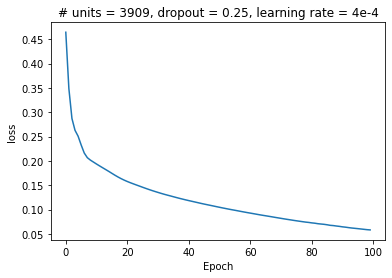

In [22]:
plt.plot(df_train.index, df_train.loss)


Text(0.5, 1.0, '# units = 3909, dropout = 0.25, learning rate = 4e-4')

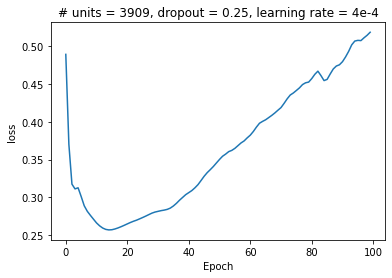

In [24]:
plt.plot(df_validate.index, df_validate.loss)
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.title("# units = 3909, dropout = 0.25, learning rate = 4e-4")

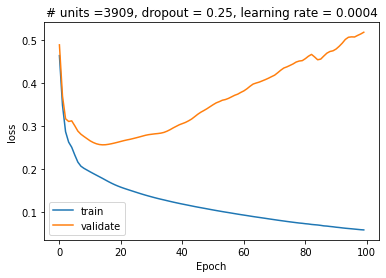

In [29]:
# plt.plot(df_validate.index, df_validate.loss, label="validate")
# plt.plot(df_train.index, df_train.loss, label="train")
# plt.xlabel("Epoch")
# plt.ylabel("loss")
# plt.title("# units = 3909, dropout = 0.25, learning rate = 4e-4")
# plt.legend()
plot_result([df_train, df_validate], "loss", 3909, 0.25, 4e-4)

plot f1

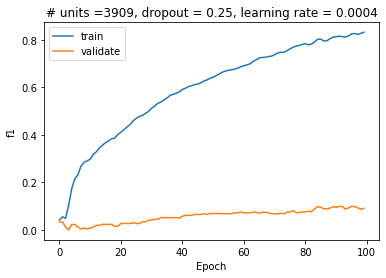

In [30]:
plot_result([df_train, df_validate], "f1", 3909, 0.25, 4e-4)

plot recall

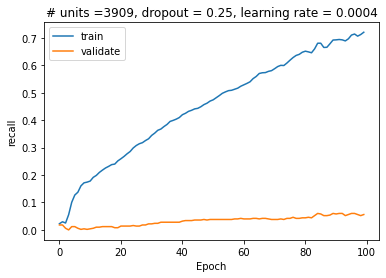

In [31]:
plot_result([df_train, df_validate], "recall", 3909, 0.25, 4e-4)

plot precision

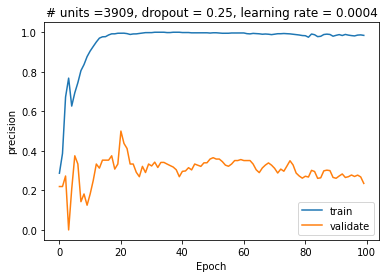

In [32]:
plot_result([df_train, df_validate], "precision", 3909, 0.25, 4e-4)